In [118]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json
from collections import defaultdict
import datetime
from math import ceil


In [119]:
rootDir = "newweek"
idx1 = 0
idx2 = 5
currDayDir = os.path.join(rootDir, os.listdir(rootDir)[idx1]) 
currAircFile = os.path.join(currDayDir, os.listdir(currDayDir)[idx2])
currAircraftId = os.listdir(currDayDir)[idx2].split(".")[0].replace("aircraft", "")

In [120]:
currData = pd.read_csv(currAircFile)

In [121]:
currTimeRange = list(currData["timeRange"].value_counts().index)
currTimeRange.sort()
columnNum = 3
rowNum = ceil(len(currTimeRange)/columnNum)

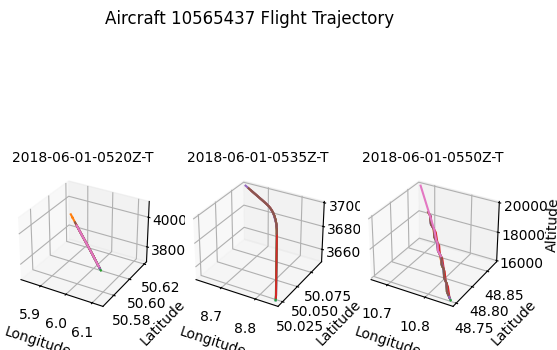

In [122]:
fig = plt.figure()
fig.suptitle("Aircraft {} Flight Trajectory".format(currAircraftId))

for idx in range(1, len(currTimeRange)+1):
    ax = fig.add_subplot(rowNum, columnNum, idx, projection = "3d")
    currScale = currTimeRange[idx-1]
    currBlock = currData[currData["timeRange"] == currScale]
    for i in range(currBlock.shape[0]):
        currSeries = currBlock.iloc[i, :]
        CosData = pd.DataFrame(pd.DataFrame(eval(currSeries["Cos"])).values.reshape(-1,4))
        CosData.columns = ["latitude", "longitude", "server time", "altitude"]
        del CosData["server time"]
        latitude = CosData["latitude"]
        longitude = CosData["longitude"]
        altitude = CosData["altitude"]
        ax.plot(longitude, latitude, altitude)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        ax.set_zlabel('Altitude')
        ax.set_title( currScale.split(".")[0], fontdict= {"fontsize" : 10} )
    
plt.show()